For this project, I analyzed the 2024 Stack Overflow Developer Survey from (https://survey.stackoverflow.co/) to discover what factors have an influence on a software developer's salary. The dataset includes responses from thousands of developers and cover aspects like education, job type, experience, remote work status, and etc.

This project follows the CRISP-DM process:

Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment

Business Understanding:

Lets be honest, salary is one of the most important topic when talking about jobs and is probably the most taboo to talk about. While skills and experience matter, salary varies dramatically based on various factors such as location, company size, education level, and remote work flexibility. As someone entering the tech field, I am especially facinated by what factors are beneficial so that I can have an edge when applying to jobs.

I utilized the data to determine:

Which factors most affect salary?
Can we use survey data to build a model that predicts compensation?
How accurate can we get with a simple, interpretable model?

I hope to help developers with my analysis to understand which background details or work settings may be correlated with higher compensation. For example-

Do remote workers earn more?
Does company size matter?
How important is education level?

We will use a Random Forest model to make predictions and walk through each step of the data


In [15]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline



Import libraries for data analysis pandas, visualization, and machine learning 

In [18]:
# read dataset "survey_results_public.csv" and filter
df = pd.read_csv("survey_results_public.csv")
selected_cols = [
    'ConvertedCompYearly', 'EdLevel', 'YearsCodePro',
    'RemoteWork', 'OrgSize', 'Country', 'DevType',
    'Employment', 'MainBranch'
]
# Encode features
df_model = df[selected_cols].dropna()
X = df_model.drop('ConvertedCompYearly', axis=1)
y = df_model['ConvertedCompYearly']
X_encoded = pd.get_dummies(X)


In [20]:
# Remove extreme outliers in salary data to get better data output
df_model = df_model[df_model['ConvertedCompYearly'] < 500000]

Removed missing values and salary outliers. Converted categorical text into numeric format using one-hot encoding.


In [23]:
# read dataset "survey_results_public.csv"
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
# Use Grid Search CV best combination of parameters for a Random Forest model for Random Forest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define parameters to test
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Set up and run grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


Trained a Random Forest model and used GridSearchCV to find the best configuration using cross-validation.

The Random Forest model is a type of machine learning algorithm that builds decision trees and then averages their predictions to predict various salaries. I originally tried using a simple linear regression model but it did not handle the data as expected especially with things like education level or remote work, which are not numbers. Random Forest is better at dealing with these kinds of categories and more complex patterns. It also gave a more realistic salary prediction which helped for this project


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


MAE: 42952.61
MSE: 48267504699.36
RMSE: 219698.67
R² Score: 0.049


The model achieved an R² score of 0.049, meaning it only explains about 5% of variation in salaries. It is low a score, however is expected due to the complex nature of salary prediction and limited variables.


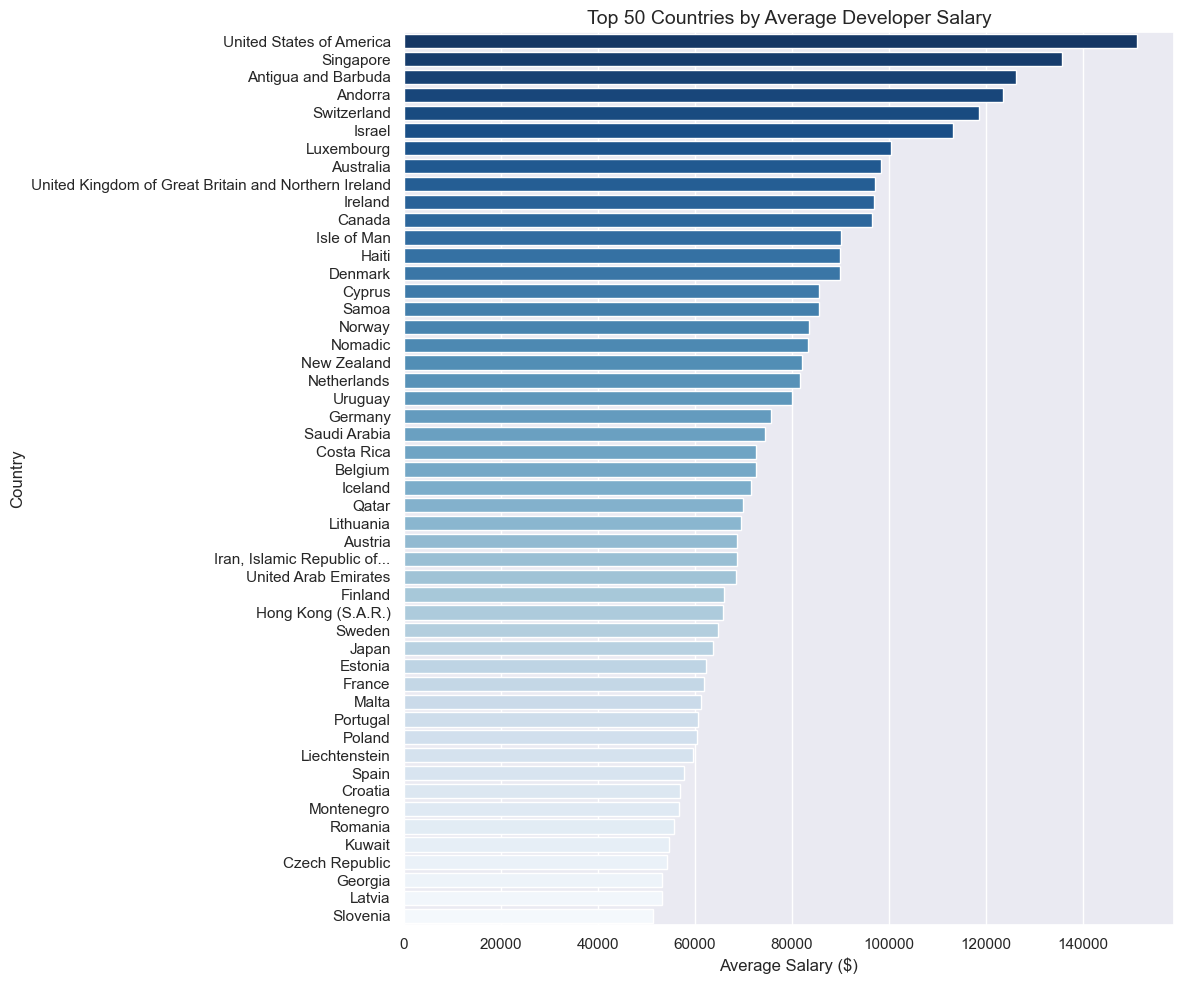

In [37]:
# Group data by country and calculate mean salary
avg_salary_by_country = df_model.groupby('Country')['ConvertedCompYearly'].mean().sort_values(ascending=False)

# Keep only the top 50 highest average salaries
top_50_countries = avg_salary_by_country.head(50)

# Plot as horizontal bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x=top_50_countries.values, y=top_50_countries.index, hue=top_50_countries.index, palette='Blues_r', legend=False)

plt.title('Top 50 Countries by Average Developer Salary', fontsize=14)
plt.xlabel('Average Salary ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


This chart shows the top 50 developer salaries in the datalist. The United States is the highest paid, but it seems as if 
developer is a great high paying career in several countries.

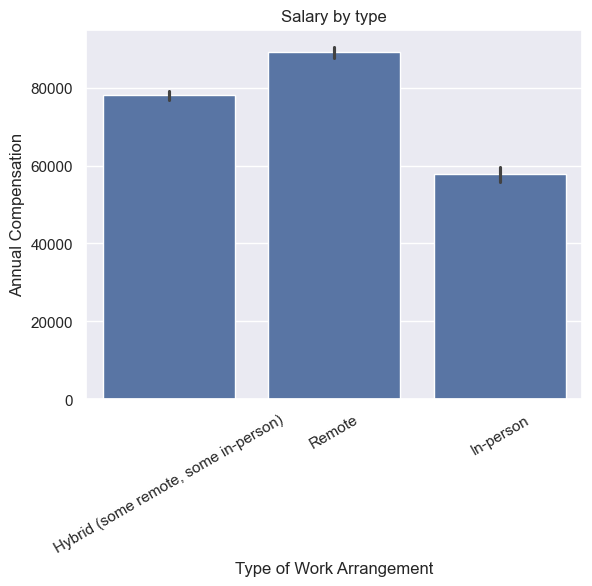

In [81]:
#Bar chart to show salary by work arrangement 
sns.barplot(data=df_model, x='RemoteWork', y='ConvertedCompYearly')
plt.title('Salary by type')
plt.xlabel('Type of Work Arrangement') 
plt.ylabel('Annual Compensation')
plt.xticks(rotation=30)
plt.show()


This bar chart symbolizes annual compensation based off of the type of work arrangement. It shows remote as making the most income per year.

In [84]:
# Create a sample developer profile
sample = pd.DataFrame({
    'EdLevel': ["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"],
    'YearsCodePro': [4],
    'RemoteWork': ['Remote'],
    'OrgSize': ['100 to 499 employees'],
    'Country': ['United States'],
    'DevType': ['Developer, full-stack'],
    'Employment': ['Employed full-time'],
    'MainBranch': ['I am a developer by profession']
})

# Encode and align the sample data
sample_encoded = pd.get_dummies(sample)
sample_encoded = sample_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Predict salary
predicted_salary = best_model.predict(sample_encoded)[0]
print(f"Predicted Salary: ${predicted_salary:,.0f}")


Predicted Salary: $64,303


The model predicts an estimated yearly salart of $64,303.
The result is based on features we selected for the model so factors like job role, country, and specific skills were not included, therefore the prediction should be interpreted as a general estimate.

The results are not an accurate overall predicted annual salary of developers worldwide as I limited search results.

I selected the United States as the country because it was the most represented country in the Stack Overflow Developer Survey and choosing a highly represented country helps ensure the model has enough training data to make a more reliable prediction.

Organization size of 100 to 499 employees was chosen because I feel it represents a medium sized company. 

Other filters such as a bachelor's degree, full-stack developer role, and full-time employment, also reflect normal survey respondents. The # of years of pro coding experience was set to 4, to represent a developer in the early-mid career stage to give a practical salary estimate for someone not just starting out but not yet senior.


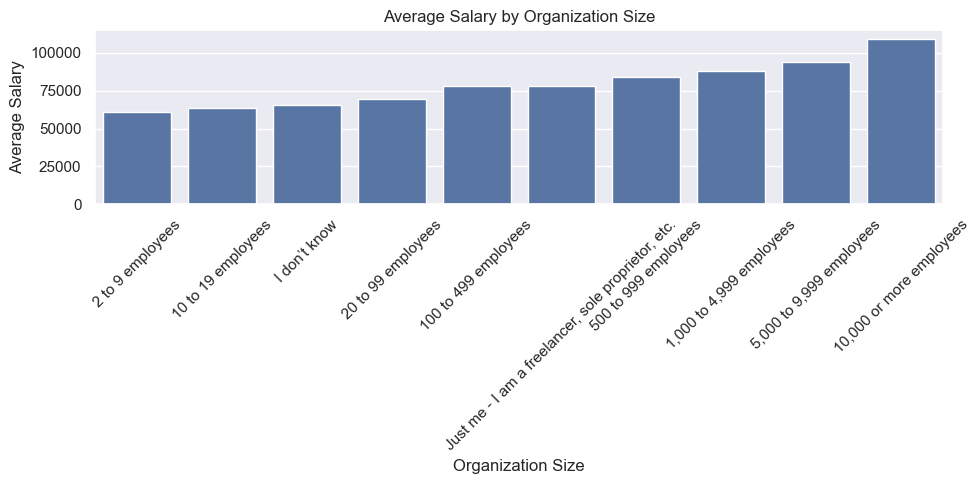

In [88]:
#Average salary by size of organization
plt.figure(figsize=(10, 5))
avg_salary_by_size = df_model.groupby('OrgSize')['ConvertedCompYearly'].mean().sort_values()
sns.barplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values)
plt.title('Average Salary by Organization Size')
plt.xlabel('Organization Size')  
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


I created a bar chart to show average salary based off of organization size

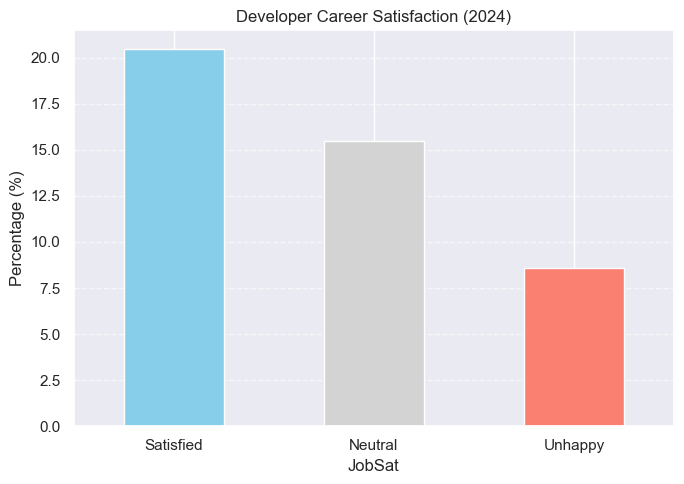

In [41]:
import matplotlib.pyplot as plt

# Categorize satisfaction by either satisfied, nuetral, or unhappy
def categorize_satisfaction(x):
    if x in [8.0, 9.0, 10.0]:
        return 'Satisfied'
    elif x in [7.0, 6.0]:
        return 'Neutral'
    elif x in [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]:
        return 'Unhappy'
    else:
        return 'No Response'

# Apply categorization
job_sat_category = df['JobSat'].apply(categorize_satisfaction)

# Count percentages
job_sat_counts = job_sat_category.value_counts(normalize=True) * 100
job_sat_counts = job_sat_counts[['Satisfied', 'Neutral', 'Unhappy']]  

# Plot
plt.figure(figsize=(7,5))
job_sat_counts.plot(kind='bar', color=['skyblue', 'lightgray', 'salmon'])
plt.title('Developer Career Satisfaction (2024)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This graph is based off of approximately 13,800 respondents who answered the JobSat question on the survey.

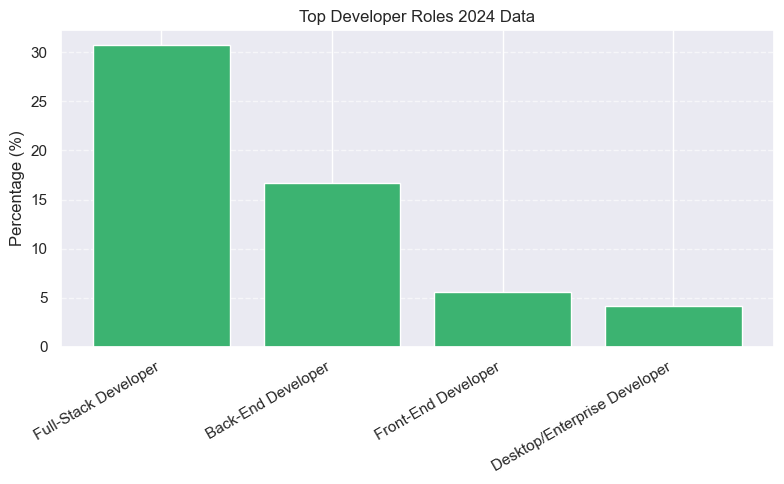

In [47]:
#create a bar chart showing the 4 developer roles and their %
import matplotlib.pyplot as plt

roles = [
    'Full-Stack Developer', 
    'Back-End Developer', 
    'Front-End Developer', 
    'Desktop/Enterprise Developer'
]
role_percentages = [30.7, 16.7, 5.6, 4.2]

# Create the bar chart
plt.figure(figsize=(8,5))
plt.bar(roles, role_percentages, color='mediumseagreen')
plt.ylabel('Percentage (%)')
plt.title('Top Developer Roles 2024 Data')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



These are the top developer roles based off of Stack overflow's 2024 survey